In [1]:
import os
import sys

from analysis import *
import matplotlib.pyplot as plt
import numpy as np

print("Setup completed successfully")

Setup completed successfully


# Test influence of number of moves to solution found

Failed to build the project
stdout: 
stderr: Error: cabal: There is no <pkgname>.cabal package file or cabal.project file.
To build packages locally you need at minimum a <pkgname>.cabal file. You can
use 'cabal init' to create one.

For non-trivial projects you will also want a cabal.project file in the root
directory of your project. This file lists the packages in your project and
all other build configuration. See the Cabal user guide for full details.


Test 1/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 120.0, duration: 0.06245994567871094
Test 2/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 120.0, duration: 0.06196308135986328
Test 3/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 120.0, duration: 0.05190777778625488
Test 4/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 120.0, duration: 0.06196999549865723
Test 5/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 120.0, duration: 0.06207680702209473
Te

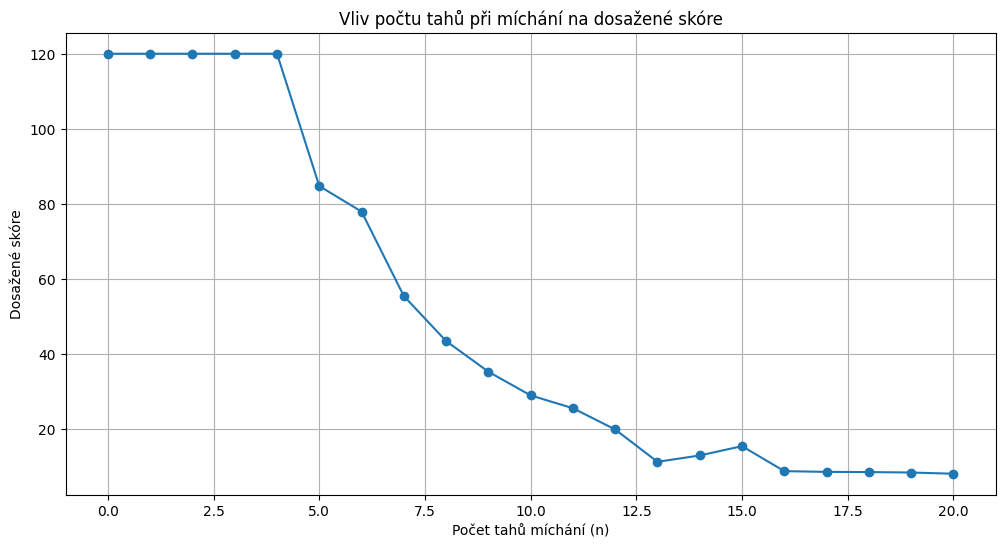

In [3]:
def test_scramble_moves_influence(max_n=100):
    n_values = range(0, max_n + 1)
    scores = []
    
    for n in n_values:
        score, _, _ = test_solver(time_limit=100, search_depth=4, search_depth_g1=5, num_tests=100, num_moves=n)
        scores.append(score)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(n_values, scores, marker='o')
    plt.title("Vliv počtu tahů při míchání na dosažené skóre")
    plt.xlabel("Počet tahů míchání (n)")
    plt.ylabel("Dosažené skóre")
    plt.grid(True)
    plt.savefig("scramble_moves_influence.png")
    plt.show()


test_scramble_moves_influence(max_n=20)